# STEM Salary Compensation Analysis and Prediction


#Dataset Description
The dataset is from Kaggle - [“Data Science and STEM Salaries- 62,000+ STEM salaries scraped from levels.fyi”](https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries). Levels.fyi is a website for any anonymous to report their salary and could be used to compare career levels and compensation packages across different companies. This dataset includes 29 attributes and 62,000 records dated ranging from Jun. 7th,
2017, to Aug. 17th, 2021. Key attributes including company name, company level, title, location, total yearly compensation, race, education level etc.

# Package load and data import

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
%matplotlib inline

import missingno as msno

import sklearn
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
#df = pd.read_csv('DATA 2.csv')
df.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5000,1.5000,NaN,107000.0000,20000.0000,10000.0000,NaN,NaN,7392,807.0000,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0000,3.0000,NaN,0.0000,0.0000,0.0000,NaN,NaN,7419,807.0000,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0000,0.0000,NaN,155000.0000,0.0000,0.0000,NaN,NaN,11527,819.0000,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0000,5.0000,NaN,157000.0000,180000.0000,35000.0000,NaN,NaN,7472,807.0000,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0000,3.0000,NaN,0.0000,0.0000,0.0000,NaN,NaN,7322,807.0000,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
df.shape

(62642, 29)

#Data Cleaning

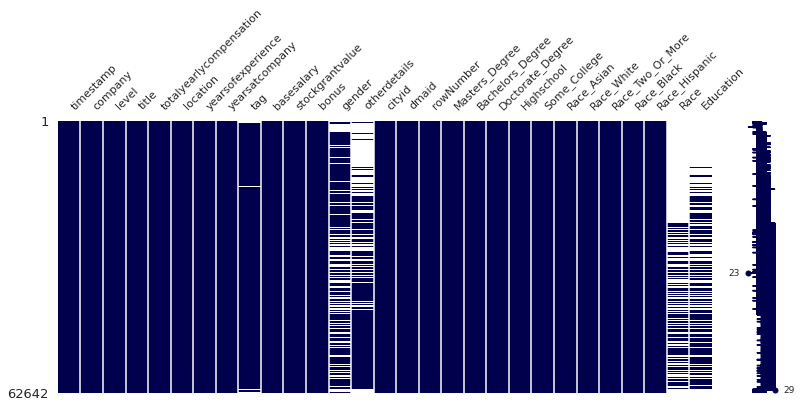

In [ ]:
msno.matrix(df, figsize=(13, 5), fontsize=11, color=(0., 0., 0.3))

In [ ]:
# filter gender that is na

df=df[df['company'].notna()]
df=df[df['level'].notna()]
df["gender"][(df["gender"]!='Male') & (df["gender"]!='Female') & (df['gender']!='Other')]="NA"
df= df.drop(df[(df['gender'] == "NA")].index)

df=df[df.totalyearlycompensation<=2500000]


#only 1 in company is na,level is na , mostly gender is na as well

print(df.columns)
#drop column dmaid, and other details, and tag
#other detail has lots of na and unorganized
#race has couple race columns already
#i assume the education of degree means the highest education, so education can be deleted 

df1=df.drop(['timestamp','rowNumber','cityid','dmaid','otherdetails','tag','Race','Education'], axis = 1)
#clean data columns without na values
print(df1.columns)

print(df1.isna().any())
print(df1.count)

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')
Index(['company', 'level', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue',
       'bonus', 'gender', 'Masters_Degree', 'Bachelors_Degree',
       'Doctorate_Degree', 'Highschool', 'Some_College', 'Race_Asian',
       'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'],
      dtype='object')
company                    False
level                      False
title                      False
totalyearlycompensation    False
loca

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df1.head(5)

,company,level,title,totalyearlycompensation,City,State,Country,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
264,GE Digital,Senior,Software Engineer,140000,San Ramon,CA,United States,4.0000,4.0000,130000,0.0000,10000.0000,Male,0,0,0,0,0,0,0,0,0,0
265,Amazon,L5,Software Engineer,172000,Seattle,WA,United States,12.0000,2.0000,142000,30000.0000,0.0000,Male,0,0,0,0,0,0,0,0,0,0
266,Uber,L5,Software Engineer,325000,San Francisco,CA,United States,7.0000,2.0000,161000,140000.0000,25000.0000,Male,0,0,0,0,0,0,0,0,0,0
269,Microsoft,60,Software Engineer,150000,Seattle,WA,United States,4.0000,0.0000,118000,5000.0000,12000.0000,Male,0,0,0,0,0,0,0,0,0,0
270,Google,L6,Software Engineer,640000,Mountain View,CA,United States,11.0000,4.0000,210000,380000.0000,50000.0000,Male,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.gender.value_counts()

Male      35642
Female     6985
Other       397
Name: gender, dtype: int64

In [ ]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
companycount=df1.groupby('company').filter(lambda x : (x['company'].count()>=6).any())
#filtered any company with only 5 frequency

inc=companycount.sort_values('company')
inc.head()
print(inc.groupby('company').company.count().nlargest(50))
#top 50 company frequency
inc.count()

company
Amazon               5525
Microsoft            3640
Google               2977
Facebook             2117
Apple                1383
Oracle                802
Salesforce            695
Intel                 693
IBM                   676
Cisco                 644
Uber                  588
Capital One           558
LinkedIn              451
VMware                449
JPMorgan Chase        400
Bloomberg             383
Qualcomm              367
Goldman Sachs         339
Intuit                320
PayPal                299
Deloitte              279
Adobe                 269
SAP                   266
Twitter               262
Walmart Labs          258
Accenture             257
Wayfair               257
Nvidia                249
Expedia               246
eBay                  229
Lyft                  219
Netflix               181
Dropbox               176
Shopify               173
Workday               164
Atlassian             160
Airbnb                158
Visa                  153
Dell

company                    40779
level                      40779
title                      40779
totalyearlycompensation    40779
location                   40779
yearsofexperience          40779
yearsatcompany             40779
basesalary                 40779
stockgrantvalue            40779
bonus                      40779
gender                     40779
Masters_Degree             40779
Bachelors_Degree           40779
Doctorate_Degree           40779
Highschool                 40779
Some_College               40779
Race_Asian                 40779
Race_White                 40779
Race_Two_Or_More           40779
Race_Black                 40779
Race_Hispanic              40779
dtype: int64

# Exploration Data Analysis

In [ ]:
data = df1.copy()
data = data.drop(['Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree','Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'], axis = 1 )
data['Education'] = df['Education']
data['Race'] = df['Race']
data.sample(10)
#fill 'Unknown' to categorical columns
data = data.fillna('Unknown')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43024 entries, 264 to 62641
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  43024 non-null  object 
 1   level                    43024 non-null  object 
 2   title                    43024 non-null  object 
 3   totalyearlycompensation  43024 non-null  int64  
 4   City                     43024 non-null  object 
 5   State                    43024 non-null  object 
 6   Country                  43024 non-null  object 
 7   yearsofexperience        43024 non-null  float64
 8   yearsatcompany           43024 non-null  float64
 9   basesalary               43024 non-null  int64  
 10  stockgrantvalue          43024 non-null  float64
 11  bonus                    43024 non-null  float64
 12  gender                   43024 non-null  object 
 13  Education                43024 non-null  object 
 14  Race                

**Data overview**<br/>
*1.Most of the data comes from company in Amazon, Microsoft, Google, Facebook, Apple. <br/>2.L4,L5,L3,L6 are the most common level name.  <br/>3.Most of the title are Software Engineer. <br/>4.Male reports more than Female in the dataset.<br/>5.Most reported data shows in Master's and Bachelor's degree.<br/>6.Asian and White is the most common race.*


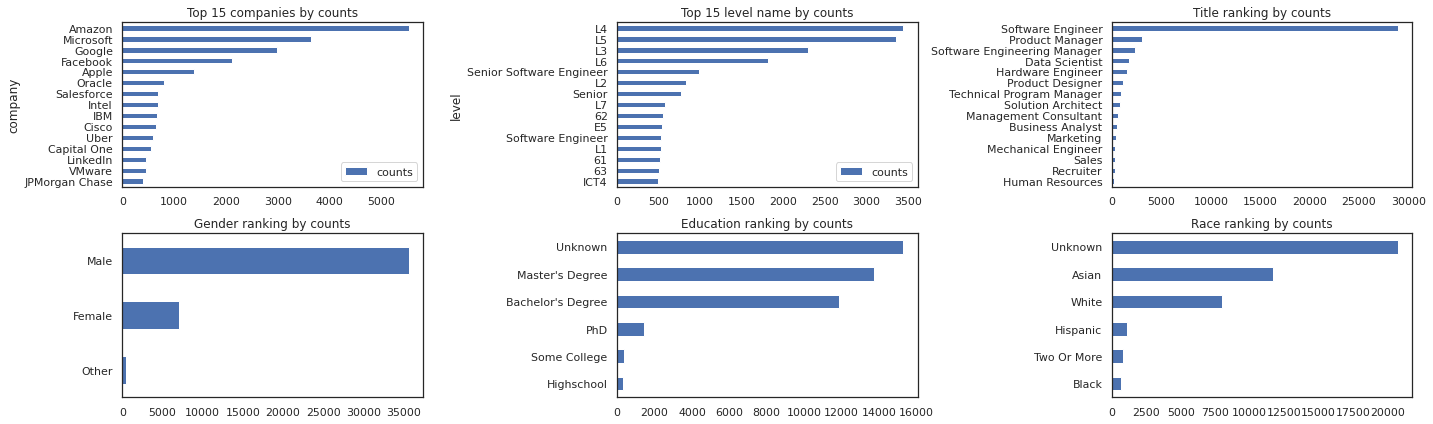

In [ ]:
fig = plt.figure(figsize=(20,6))

sub1 = fig.add_subplot(2,3,1)
company_weight_df = pd.DataFrame(data.groupby('company').company.count().sort_values(ascending = False))
company_weight_df.columns = ['counts']
company_weight_df.head(15)
company_weight_df[0:15].sort_values(by = 'counts').plot(kind="barh", title = "Top 15 companies by counts", ax = sub1)

sub2 = fig.add_subplot(2,3,2)
level_weight_df = pd.DataFrame(data.groupby('level').company.count().sort_values(ascending = False))
level_weight_df.columns = ['counts']
level_weight_df.head(15)
level_weight_df[0:15].sort_values(by = 'counts').plot(kind="barh", title = "Top 15 level name by counts", ax = sub2)

sub3 = fig.add_subplot(2,3,3)
data.title.value_counts().sort_values().plot(kind="barh",  title = "Title ranking by counts", ax = sub3)

sub4 = fig.add_subplot(2,3,4)
data.gender.value_counts().sort_values().plot(kind="barh", title = "Gender ranking by counts", ax = sub4)

sub5 = fig.add_subplot(2,3,5)
data.Education.value_counts().sort_values().plot(kind="barh", title = "Education ranking by counts", ax = sub5)

sub6 = fig.add_subplot(2,3,6)
data.Race.value_counts().sort_values().plot(kind="barh",title = "Race ranking by counts", ax = sub6)

plt.tight_layout()

In [ ]:
L4_company_count_df = pd.DataFrame(data[data.level == 'L4'].groupby('company').size().sort_values(ascending = False))
L4_company_count_df.T

company,Amazon,Google,Uber,Snap,Airbnb,Facebook,Wayfair,Pinterest,Qualtrics,WeWork,EPAM Systems,Lyft,Apple,Shopify,Instacart,Adobe,Target,Rubrik,Visa,Walmart Labs,Oracle,Boeing,Stripe,Twitch,Confluent,Square,Red Hat,Walmart,Dropbox,N26,Waymo,VMware,Two Sigma,Asana,Chime,Robinhood,Wish,Databricks,Klarna,Reddit,...,Hootsuite,Hulu,Marqeta,Marvell,McAfee,Mendix,Palantir,Panasonic Avionics,Paytm,Philips,PhonePe,Plaid,PlayVS,Podium,Postman,Pure Storage,PwC,QUEST DIAGNOSTICS,Quantcast,Quora,Rakuten,PTC,Other,Oscar Health,NVIDIA,Mercer,Microsoft,Mozilla,Myntra,NCR,NICE,New Relic,Optimizely,Nielsen,Nokia,Novetta,Nubank,Office Depot,Ola,3M
0,1139,942,121,60,45,43,41,39,36,23,23,22,18,18,17,16,15,13,12,12,11,11,10,9,9,8,8,8,8,8,8,7,7,7,7,7,7,6,6,6,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
L5_company_count_df = pd.DataFrame(data[data.level == 'L5'].groupby('company').size().sort_values(ascending = False))
L5_company_count_df.T

company,Amazon,Google,Shopify,Airbnb,Facebook,Visa,General Motors,Pinterest,Lyft,Snap,Square,Target,Instacart,Uber,Qualtrics,Waymo,Wayfair,Rubrik,Twitter,WeWork,Audible,Walmart Labs,Twitch,Intel,Walmart,Indeed,Amazon Web Services,amazon,Coinbase,Boeing,AMD,Apple,Roku,Affirm,AWS,Adobe,Salesforce,Aurora,Amazon.com,Coupang,...,Hitachi,HackerRank,HSBC,HPE,HP,HERE Technologies,Gusto,Grubhub,Grab,Google LLC,Goldman Sachs,MobileIron,Moody's,Move,Postmates,Rivian,Rippling,Revolut,Reddit,Rappi,Rakuten,QUEST DIAGNOSTICS,Puppet,Publicis Sapient,Proofpoint,Procore,Paytm,Natera,Palo Alto Networks,Olo,Okta,OfferUp,Numerator,Novetta,Northwestern Mutual,Nokia,New Relic,Neustar,NetApp,ABB
0,1822,642,63,41,33,28,23,19,18,16,15,15,13,13,13,12,12,11,11,10,10,10,9,9,9,8,7,7,7,7,7,6,6,6,6,6,5,5,5,5,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
L3_company_count_df = pd.DataFrame(data[data.level == 'L3'].groupby('company').size().sort_values(ascending = False))
L3_company_count_df.T

company,Google,Wayfair,Stripe,Facebook,Uber,Snap,Amazon,Indeed,Apple,Qualtrics,Airbnb,EPAM Systems,Adobe,Oracle,Robinhood,Walmart Labs,Pinterest,Dropbox,Supermicro,Rubrik,Walmart,Visa,Boeing,Gojek Tech,Samsung,Red Hat,Gusto,Two Sigma,WeWork,MathWorks,LinkedIn,Infosys,Waymo,Lockheed Martin,Nike,Klarna,GoDaddy,Blue Origin,CGI Group,VMware,...,Paypal,Paytm,Peloton,Plaid,PlayStation,Pluralsight,Postmates,Principal Financial Group,Procore,Procore Technologies,Prudential Financial,Pure Storage,PwC,Qualcomm,Qualia,Quantiphi,Overstock,Oscar,Mercer,Opentext,Merck,MessageBird,Micro Focus,MobileIron,MongoDB,Moody's Analytics,Motional,Move,Moveworks,Myntra,Natera,National Instruments,NetApp,New Relic,Nokia,NortonLifeLock,Novetta,Nvidia,Ola,ABB
0,856,58,57,52,47,37,25,24,22,21,19,19,19,15,13,13,12,12,12,10,9,9,9,9,9,9,8,8,8,7,7,7,7,7,7,7,6,6,6,6,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
L7_company_count_df = pd.DataFrame(data[data.level == 'L7'].groupby('company').size().sort_values(ascending = False))
L7_company_count_df.T

company,Amazon,Google,Shopify,Accenture,Salesforce,IBM,Intel,Snap,Dell Technologies,Facebook,T-Mobile,Mastercard,General Motors,Airbnb,Walmart,amazon,Lyft,Dream11,Instacart,Box,RBC,Visa,Uber,AWS,Affirm,Twitter,WeWork,Walmart Labs,BNP Paribas,Audible,Honeywell,Oracle,Juniper Networks,Booz Allen Hamilton,Discover,F5 Networks,Elastic,Excella,Amazon Web Services,GE Digital,...,Avanade,CVS Health,CIBC,Gartner,startup,GitLab,USAA,Snapchat,Square,T-mobile,Target,The Hartford,Thermo Fisher Scientific,Udemy,Postmates,Unity Technologies,VMware,Verily Life Sciences,Wealthsimple,Western Digital,Zalando,Smartsheet,PhonePe,GoDaddy,Lenovo,HPE,Informatica,Infosys,coupang,Iterable,Korn Ferry,MassMutual,Paypal,McKinsey,Motorola Solutions,New Relic,NortonLifeLock,Nuance Communications,Nutanix,AMD
0,287,70,16,11,11,10,9,9,9,6,6,5,5,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


**numerical attribution relationship**

*1.most numeric attributes are right skewed, and only the year of experience and base salary is less skewed  <br/>
2.total year compensation positive correlates to base salary, stock grant value, and bonus<br/>
3.year of experience positive correlates to years at company<br/>*

In [ ]:
data.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
count,43024.0000,43024.0000,43024.0000,43024.0000,43024.0000,43024.0000
mean,209576.1902,7.0967,2.6760,135951.3729,49507.2817,19044.8195
std,129210.1335,5.8494,3.2482,58764.8924,77878.9218,26301.5168
min,10000.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,131000.0000,3.0000,0.0000,107000.0000,0.0000,2000.0000
50%,184000.0000,6.0000,2.0000,139000.0000,24000.0000,14000.0000
75%,255000.0000,10.0000,4.0000,165000.0000,62000.0000,26000.0000
max,2500000.0000,45.0000,40.0000,1620000.0000,2000000.0000,1000000.0000


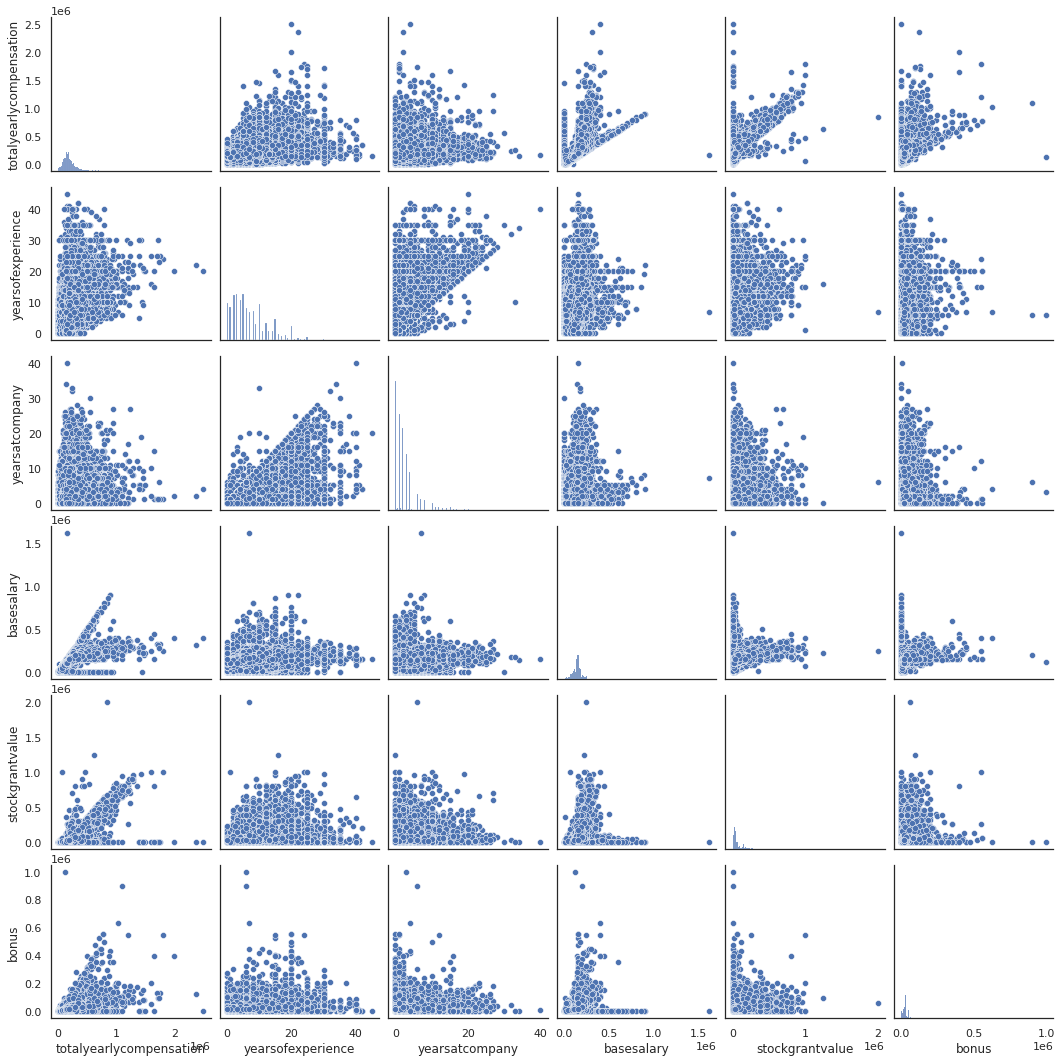

In [ ]:
fig = sns.pairplot(data)
fig.savefig("output.png")

**categorical attribution relationship**

Company<br/>
*1.The top five high pay companies of the total average compensation are Facebook(\$339,804)> LinkedIn(\$296,441)> Uber(\$289,872) > Google (\$278,451)> Apple(\$274,888).<br/>2. Distribution of total average compensation for Uber and Facebook is more spread than rest of the companies <br/>
 <br/>*

In [ ]:
top_15_company_name = company_weight_df[0:15].index
top_15_company_data = data[data.company.isin(top_15_company_name)]

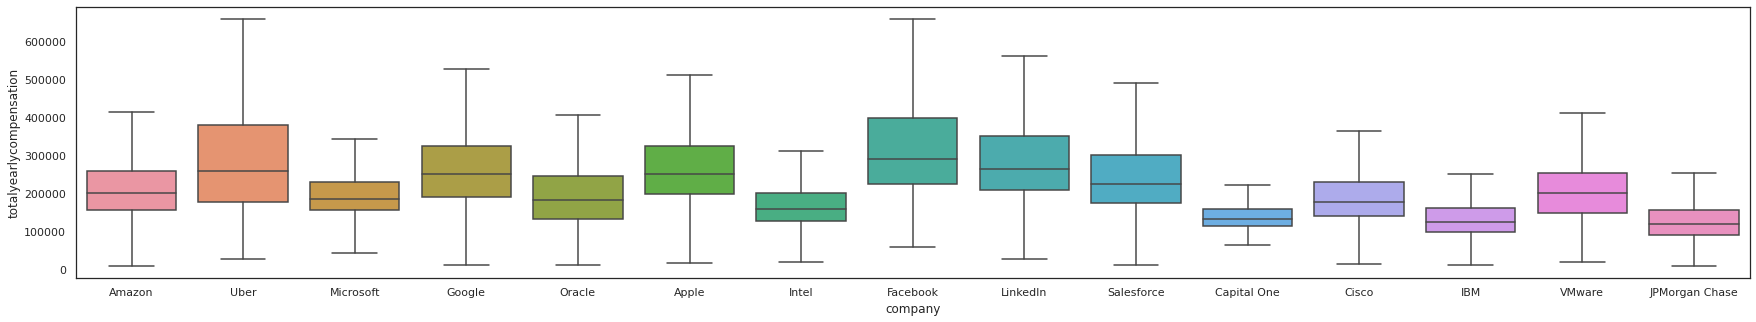

In [ ]:
f, ax = plt.subplots(figsize=(30, 5))
fig = sns.boxplot(x='company', y='totalyearlycompensation', data=top_15_company_data, showfliers = False)

In [ ]:
top_15_company_data.groupby('company').totalyearlycompensation.mean().sort_values(ascending=False)

company
Facebook         337612.4232
LinkedIn         296441.2417
Uber             289872.4490
Google           277033.2550
Apple            274888.2863
Salesforce       246597.8417
Amazon           222428.6878
VMware           211044.5434
Oracle           203200.1247
Microsoft        202750.9357
Cisco            191784.1615
Intel            176701.2987
Capital One      145094.9821
IBM              136353.5503
JPMorgan Chase   133652.5000
Name: totalyearlycompensation, dtype: float64

Level<br/>
*1. L7 has wide spread of the total compensation, compared with L3,L4,L5.<br/> 2.By comparing the elements of L3 and L7 total compensation, we found that L7 has more stock variance than L3. <br/>*

In [ ]:
top_15_level_name = level_weight_df[0:15].index
top_15_level_data = data[data.level.isin(top_15_level_name)]

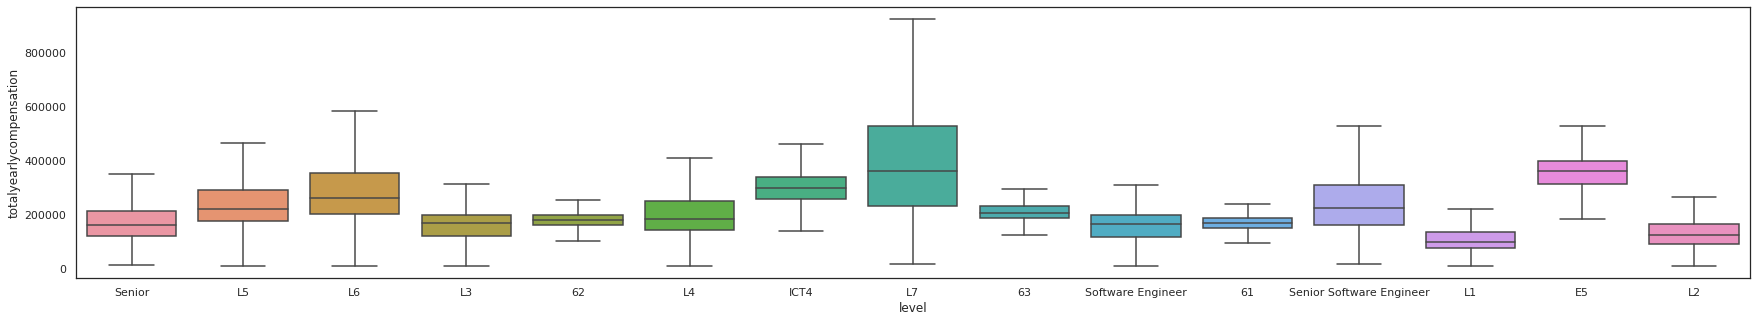

In [ ]:
f, ax = plt.subplots(figsize=(30, 5))
fig = sns.boxplot(x='level', y='totalyearlycompensation', data=top_15_level_data, showfliers = False)

In [ ]:
top_15_level_data.groupby('level').totalyearlycompensation.mean().sort_values(ascending=False)

level
L7                         392334.5009
E5                         353368.9139
ICT4                       299629.6296
L6                         288667.0348
Senior Software Engineer   249973.7108
L5                         237245.6088
63                         206023.7624
L4                         197314.2401
Senior                     178123.3766
62                         173398.5375
L3                         167497.3913
61                         162089.5509
Software Engineer          159230.6238
L2                         134284.8485
L1                         110498.0843
Name: totalyearlycompensation, dtype: float64

In [ ]:
L7_salary_pie_df = pd.DataFrame([data[data.level == 'L7'].basesalary.sum(),data[data.level == 'L7'].stockgrantvalue.sum(),data[data.level == 'L7'].bonus.sum()])
L3_salary_pie_df = pd.DataFrame([data[data.level == 'L3'].basesalary.sum(),data[data.level == 'L3'].stockgrantvalue.sum(),data[data.level == 'L3'].bonus.sum()])
pd.concat([L7_salary_pie_df, L3_salary_pie_df], axis = 1)

,0,0
0,93474000.0000,271752400.0000
1,96752000.0000,76430077.0000
2,20017000.0000,34782150.0000


Title<br/>

*1.The top three title of the total average compensation are Software Engineering Manager (\$344,552), Product Manager(\$250,215),Technical Program Manager(\$232,659).<br/>2. The least three title of the total average compensation are Mechanical Engineer(\$157,069), Recruiter(\$153,523) and Business Analyst(\$125,344) <br/>
3.Overall, Software Engineering Manager earn more among all job titles, and even its 25th percentile is higher than most of job title's average salary. <br/>*

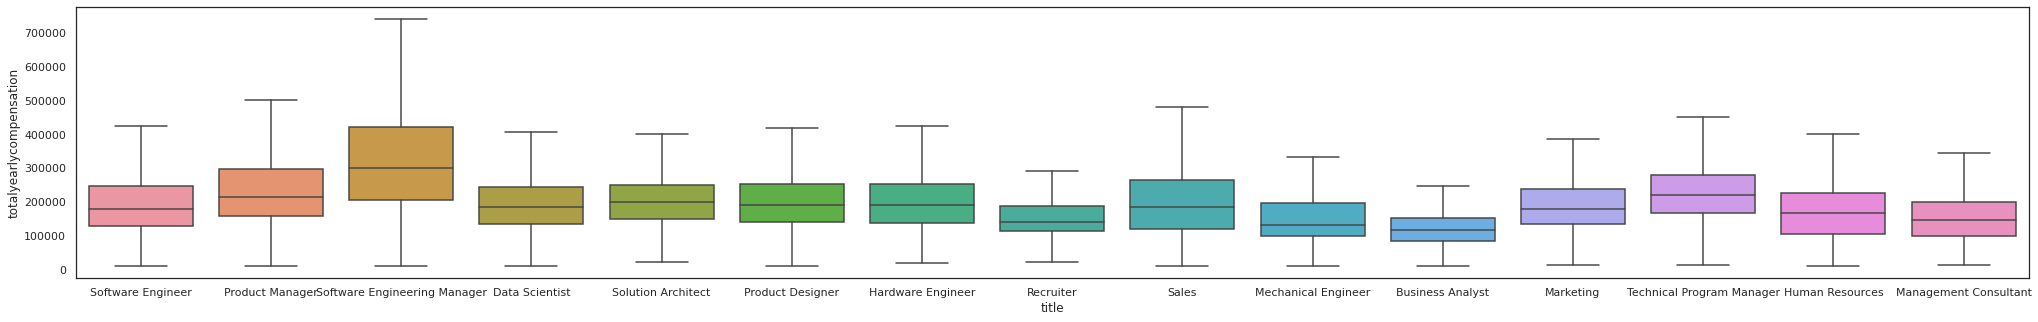

In [ ]:
f, ax = plt.subplots(figsize=(35, 5))
fig = sns.boxplot(x='title', y='totalyearlycompensation',data=data, showfliers = False)

In [ ]:
data.groupby('title').totalyearlycompensation.mean().sort_values(ascending=False)

title
Software Engineering Manager   342548.9343
Product Manager                247271.4754
Technical Program Manager      232659.1928
Solution Architect             210384.3284
Product Designer               209489.4921
Sales                          207146.4286
Hardware Engineer              206120.4977
Data Scientist                 200572.0046
Software Engineer              199142.0926
Marketing                      198762.4703
Human Resources                177898.0583
Management Consultant          157732.2581
Mechanical Engineer            157069.7674
Recruiter                      153523.8095
Business Analyst               125344.2308
Name: totalyearlycompensation, dtype: float64

Gender<br/>

*1. By looking at the average total compensation: Male (\$212,510)> Female(\$195,219)<br/>*

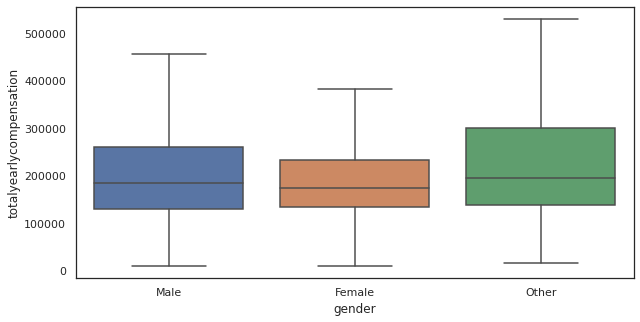

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='gender', y='totalyearlycompensation', data=data, showfliers = False)

In [ ]:
data.groupby('gender').totalyearlycompensation.mean().sort_values(ascending=False)

gender
Other    233481.1083
Male     212123.5623
Female   195219.1840
Name: totalyearlycompensation, dtype: float64

Education<br/>

*1. By looking at the average total compensation: PhD (\$286,567)> Master(\$218505) > Some College(\$211,293) > Highschool(\$183,967) > Bachelor (\$177,424)<br/>2. Education earns PhD more, but not for Bachelor degree. <br/> 3.This is because people who owns bachelor degree tend to have similar range of total compensation while high school degree owner has widely spread of total compensation.*

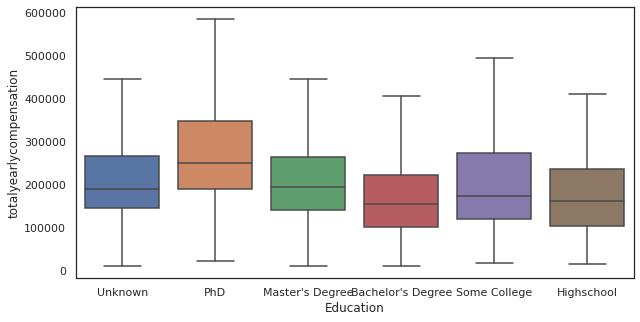

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='Education', y='totalyearlycompensation', data=data, showfliers = False)

In [ ]:
data.groupby('Education').totalyearlycompensation.mean().sort_values(ascending=False)

Education
PhD                 286567.9443
Unknown             220283.9333
Master's Degree     217848.1546
Some College        211293.1034
Highschool          183967.6375
Bachelor's Degree   177424.1836
Name: totalyearlycompensation, dtype: float64

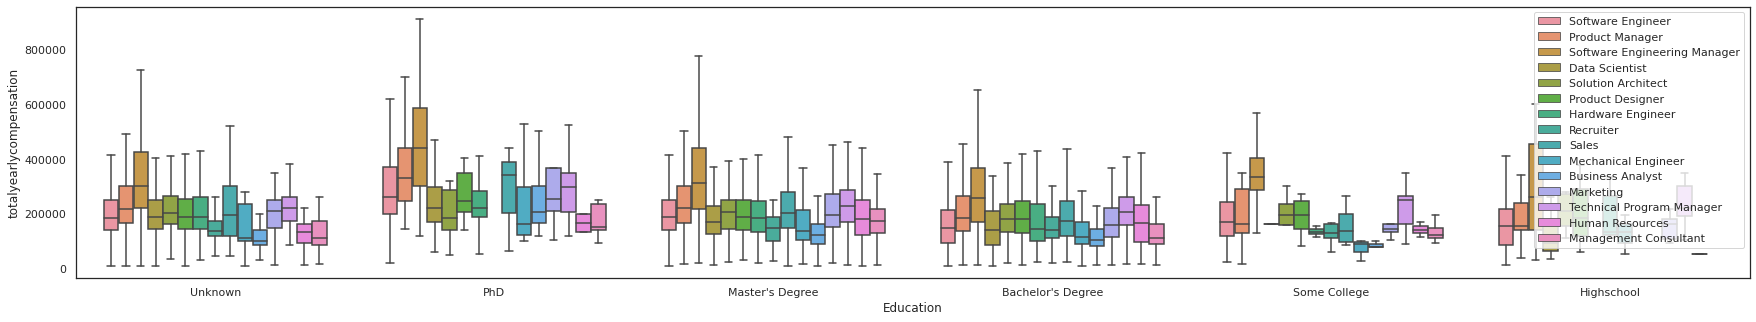

In [ ]:
f, ax = plt.subplots(figsize=(30, 5))
fig = sns.boxplot(x='Education', y='totalyearlycompensation', data=data, hue = 'title', showfliers = False)
fig.legend()

Race<br/>

*1. By looking at the average total compensation: White(\$206,377)> Two Or More(\$204,773) >Asian(\$193,380) > Hispanic(\$189,832) > Black (\$180,900)<br/>2. The difference between White and Black is \$25,477  <br/>*

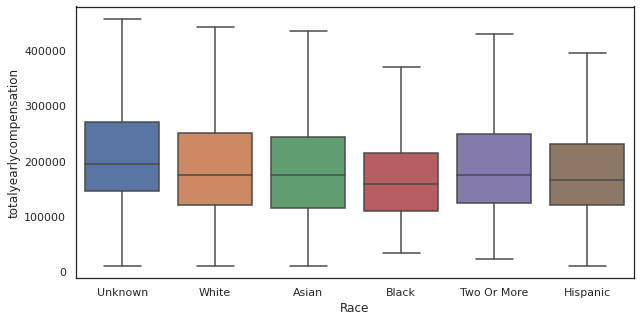

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='Race', y='totalyearlycompensation', data=data, showfliers = False)

In [ ]:
data.groupby('Race').totalyearlycompensation.mean().sort_values(ascending=False)

Race
Unknown       222541.0691
White         206377.7889
Two Or More   204773.5849
Asian         192602.0898
Hispanic      189832.1429
Black         180900.7299
Name: totalyearlycompensation, dtype: float64

# Regression Analysis


In [ ]:
df2=inc.copy()

In [ ]:
#Top 20 countries
top_20_country=df2.Country.value_counts().head(20)
top_20_name=top_20_country.index
top_20 = df2[df2.Country.isin(top_20_name)]

In [ ]:
top_20.count()

company                    40348
level                      40348
title                      40348
totalyearlycompensation    40348
City                       40348
State                      40348
Country                    40348
yearsofexperience          40348
yearsatcompany             40348
basesalary                 40348
stockgrantvalue            40348
bonus                      40348
gender                     40348
Masters_Degree             40348
Bachelors_Degree           40348
Doctorate_Degree           40348
Highschool                 40348
Some_College               40348
Race_Asian                 40348
Race_White                 40348
Race_Two_Or_More           40348
Race_Black                 40348
Race_Hispanic              40348
dtype: int64

In [ ]:
#Top 50 companies
top_50=top_20.company.value_counts().head(50)
#top_50_company_name = company_weight_df[0:15].index
top_50_company_name = top_50.index 
top_50_company_data = top_20[top_20.company.isin(top_50_company_name)]

In [ ]:
final = top_50_company_data.copy()

In [ ]:
final.count()

company                    28564
level                      28564
title                      28564
totalyearlycompensation    28564
City                       28564
State                      28564
Country                    28564
yearsofexperience          28564
yearsatcompany             28564
basesalary                 28564
stockgrantvalue            28564
bonus                      28564
gender                     28564
Masters_Degree             28564
Bachelors_Degree           28564
Doctorate_Degree           28564
Highschool                 28564
Some_College               28564
Race_Asian                 28564
Race_White                 28564
Race_Two_Or_More           28564
Race_Black                 28564
Race_Hispanic              28564
dtype: int64

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols

In [ ]:
logit_model = ols('totalyearlycompensation ~ company+Country+yearsofexperience+yearsatcompany+basesalary+stockgrantvalue+gender+Masters_Degree+Bachelors_Degree+Doctorate_Degree+Highschool+Some_College+Race_Asian+Race_White+Race_Two_Or_More+Race_Black+Race_Hispanic',data=final).fit()
#print(final.value_counts())
print(logit_model.summary())

                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.818
Model:                                 OLS   Adj. R-squared:                  0.818
Method:                      Least Squares   F-statistic:                     7565.
Date:                     Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                             22:48:37   Log-Likelihood:            -3.5327e+05
No. Observations:                    28564   AIC:                         7.066e+05
Df Residuals:                        28546   BIC:                         7.067e+05
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
final.head()

,company,level,title,totalyearlycompensation,City,State,Country,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
38162,Accenture,Analyst,Management Consultant,78000,Seattle,WA,United States,1.0000,1.0000,74000,2000.0000,2000.0000,Male,0,1,0,0,0,0,1,0,0,0
19100,Accenture,Consultant,Management Consultant,193000,New York,NY,United States,6.0000,1.0000,160000,0.0000,33000.0000,Male,1,0,0,0,0,0,0,0,0,0
53492,Accenture,l1,Software Engineer,10000,Hyderabad,TS,India,3.0000,3.0000,10000,0.0000,0.0000,Male,0,1,0,0,0,1,0,0,0,0
39793,Accenture,Consultant,Management Consultant,97000,Chicago,IL,United States,2.0000,2.0000,94000,0.0000,3000.0000,Female,0,1,0,0,0,0,0,0,0,1
28275,Accenture,Manager,Data Scientist,160000,Washington,DC,United States,12.0000,1.0000,146000,0.0000,15000.0000,Male,1,0,0,0,0,0,1,0,0,0


In [ ]:
label = LabelEncoder()
final['gender']=final[['gender']].apply(label.fit_transform)

#company_label = LabelEncoder()
final['company']=final[['company']].apply(label.fit_transform)

#country_label = LabelEncoder()
final['Country']=final[['Country']].apply(label.fit_transform)

final['title']=final[['title']].apply(label.fit_transform)




In [ ]:
final.head()

,company,level,title,totalyearlycompensation,City,State,Country,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
38162,0,Analyst,4,78000,Seattle,WA,19,1.0000,1.0000,74000,2000.0000,2000.0000,1,0,1,0,0,0,0,1,0,0,0
19100,0,Consultant,4,193000,New York,NY,19,6.0000,1.0000,160000,0.0000,33000.0000,1,1,0,0,0,0,0,0,0,0,0
53492,0,l1,11,10000,Hyderabad,TS,14,3.0000,3.0000,10000,0.0000,0.0000,1,0,1,0,0,0,1,0,0,0,0
39793,0,Consultant,4,97000,Chicago,IL,19,2.0000,2.0000,94000,0.0000,3000.0000,0,0,1,0,0,0,0,0,0,0,1
28275,0,Manager,1,160000,Washington,DC,19,12.0000,1.0000,146000,0.0000,15000.0000,1,1,0,0,0,0,0,1,0,0,0


In [ ]:

y=final.totalyearlycompensation
final.columns
features=['company','title','Country','gender','yearsofexperience','yearsatcompany','Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic']
x=final[features]

In [ ]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
train_X, val_X, train_y, val_y = train_test_split(x, y,random_state = 0)
stem_model=DecisionTreeRegressor(max_leaf_nodes=100,random_state=1)
stem_model.fit(train_X,train_y)
y_pred=stem_model.predict(val_X)
print(mean_absolute_error(y_pred,val_y))


61740.57468565379


In [ ]:
#parameter tuning
stem_model=DecisionTreeRegressor(max_leaf_nodes=500,random_state=1)
stem_model.fit(train_X,train_y)
y_pred=stem_model.predict(val_X)
print(mean_absolute_error(y_pred,val_y))

56824.77242850626


In [ ]:
pred=pd.DataFrame(y_pred,index=val_y.index)
pred.describe()

,0
count,7141.0000
mean,232316.3066
std,115411.1854
min,37947.2362
25%,165654.2625
50%,218358.9744
75%,273359.3750
max,1755000.0000


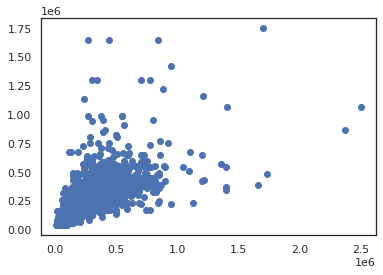

In [ ]:
plt.scatter(val_y,pred)

In [ ]:
#random forest regression
from sklearn.ensemble import RandomForestRegressor

ran_model = RandomForestRegressor(random_state=1)
ran_model.fit(train_X,train_y)
y_pred=ran_model.predict(val_X)
print(mean_absolute_error(y_pred,val_y))

53192.67925724376


In [ ]:
from xgboost import XGBRegressor

xg_model = XGBRegressor(n_estimators=700,learning_rate=0.08, n_jobs=4)
xg_model.fit(train_X, train_y)
y_pred=xg_model.predict(val_X)
print(mean_absolute_error(y_pred,val_y))


[08:31:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
50634.30657510259


**Classification - Bins**

In [ ]:
final.head()

,company,level,title,totalyearlycompensation,City,State,Country,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
38162,0,Analyst,4,78000,Seattle,WA,19,1.0000,1.0000,74000,2000.0000,2000.0000,1,0,1,0,0,0,0,1,0,0,0
19100,0,Consultant,4,193000,New York,NY,19,6.0000,1.0000,160000,0.0000,33000.0000,1,1,0,0,0,0,0,0,0,0,0
53492,0,l1,11,10000,Hyderabad,TS,14,3.0000,3.0000,10000,0.0000,0.0000,1,0,1,0,0,0,1,0,0,0,0
39793,0,Consultant,4,97000,Chicago,IL,19,2.0000,2.0000,94000,0.0000,3000.0000,0,0,1,0,0,0,0,0,0,0,1
28275,0,Manager,1,160000,Washington,DC,19,12.0000,1.0000,146000,0.0000,15000.0000,1,1,0,0,0,0,0,1,0,0,0


In [ ]:
final['target']=pd.cut(x = final['totalyearlycompensation'],
                        bins = [9999,75000,150000,2500000], 
                        labels = [1, 2,3])

In [ ]:
final.target.value_counts()

3    21700
2     5444
1     1420
Name: target, dtype: int64

In [ ]:
final.head()

,company,level,title,totalyearlycompensation,City,State,Country,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,target
38162,0,Analyst,4,78000,Seattle,WA,19,1.0000,1.0000,74000,2000.0000,2000.0000,1,0,1,0,0,0,0,1,0,0,0,2
19100,0,Consultant,4,193000,New York,NY,19,6.0000,1.0000,160000,0.0000,33000.0000,1,1,0,0,0,0,0,0,0,0,0,3
53492,0,l1,11,10000,Hyderabad,TS,14,3.0000,3.0000,10000,0.0000,0.0000,1,0,1,0,0,0,1,0,0,0,0,1
39793,0,Consultant,4,97000,Chicago,IL,19,2.0000,2.0000,94000,0.0000,3000.0000,0,0,1,0,0,0,0,0,0,0,1,2
28275,0,Manager,1,160000,Washington,DC,19,12.0000,1.0000,146000,0.0000,15000.0000,1,1,0,0,0,0,0,1,0,0,0,3


**Decision Tree W/O Oversampling**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
features1=['company','title','gender','Country','yearsofexperience','yearsatcompany','Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic']
x1= final[features1]
y1=final['target']
x_train,x_val,y_train,y_val=train_test_split(x1,y1,random_state=0)
Dmodel = DecisionTreeClassifier()
Dmodel.fit(x_train,y_train)
y_pred=Dmodel.predict(x_val)
res=confusion_matrix(y_val,y_pred)
print(res)

[[ 260   60   12]
 [  84  819  520]
 [  15  521 4850]]


In [ ]:
Accuracy=(res[0][0]+res[1][1]+res[2][2])/res.sum()
print("Accuracy of Decision tree model:",Accuracy)

Accuracy of Decision tree model: 0.830275871726649


**Decision tree With Oversampling**

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from imblearn.over_sampling import RandomOverSampler
import imblearn
features1=['company','title','gender','Country','yearsofexperience','yearsatcompany','Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic']
X=final[features1]
y = final["target"]
oversample = RandomOverSampler()
X,y=oversample.fit_resample(X, y)
final_1 = [y,X]
a=pd.Series(final_1[0])
b=pd.DataFrame(final_1[1])
final_df=pd.concat([a,b],axis=1)

print(final_df["target"].value_counts())

3    21700
2    21700
1    21700
Name: target, dtype: int64


In [ ]:
x_train,x_val,y_train,y_val=train_test_split(X,y,random_state=0)
Dmodel = DecisionTreeClassifier()
Dmodel.fit(x_train,y_train)
y_pred=Dmodel.predict(x_val)
res=confusion_matrix(y_val,y_pred)
print(res)

[[5409   27    3]
 [  83 5181  269]
 [  24  762 4517]]


In [ ]:
Accuracy1=(res[0][0]+res[1][1]+res[2][2])/res.sum()
print("Accuracy of Decision tree model after over sampling:",Accuracy1)

Accuracy of Decision tree model after over sampling: 0.9282334869431643


**Random Forest w/o Oversampling**

In [ ]:


from sklearn.ensemble import RandomForestClassifier

features1=['company','title','gender','Country','yearsofexperience','yearsatcompany','Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic']
x2= final[features1]
y2=final['target']
x1_train,x1_val,y1_train,y1_val=train_test_split(x2,y2,random_state=0)
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(x_train,y_train)
y_pred=forest_model.predict(x_val)
res=confusion_matrix(y_val,y_pred)
print(res)




[[5409   27    3]
 [  78 5150  305]
 [  15  670 4618]]


In [ ]:
Accuracy1=(res[0][0]+res[1][1]+res[2][2])/res.sum()
print("Accuracy of Random forest model before over sampling:",Accuracy1)

Accuracy of Random forest model before over sampling: 0.9325345622119816


**Random Forest with Oversampling**

In [ ]:
features1=['company','title','gender','Country','yearsofexperience','yearsatcompany','Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic']
X=final[features1]
y = final["target"]
oversample = RandomOverSampler()
X,y=oversample.fit_resample(X, y)
final_1 = [y,X]
a=pd.Series(final_1[0])
b=pd.DataFrame(final_1[1])
final_df=pd.concat([a,b],axis=1)

In [ ]:
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(x_train,y_train)
y_pred=forest_model.predict(x_val)
res=confusion_matrix(y_val,y_pred)
print(res)

[[5409   27    3]
 [  78 5150  305]
 [  15  670 4618]]


In [ ]:
Accuracy1=(res[0][0]+res[1][1]+res[2][2])/res.sum()
print("Accuracy of Random forest model after over sampling:",Accuracy1)

Accuracy of Random forest model after over sampling: 0.9325345622119816


# Cluster Analysis

In [ ]:

df1.iloc[:,[3,7,8,9]]



,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary
264,140000,4.0000,4.0000,130000
265,172000,12.0000,2.0000,142000
266,325000,7.0000,2.0000,161000
269,150000,4.0000,0.0000,118000
270,640000,11.0000,4.0000,210000
...,...,...,...,...
62610,135000,1.0000,0.0000,104000
62611,350000,14.0000,1.0000,160000
62612,305000,20.0000,2.0000,200000
62613,152000,3.0000,0.0000,106000


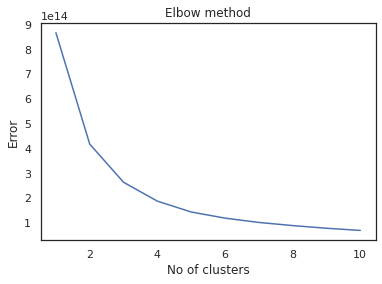

In [ ]:
from sklearn.cluster import KMeans
y = df1.iloc[:,[3,7,8,9]].values
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(y)
    kmeans.fit(y)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

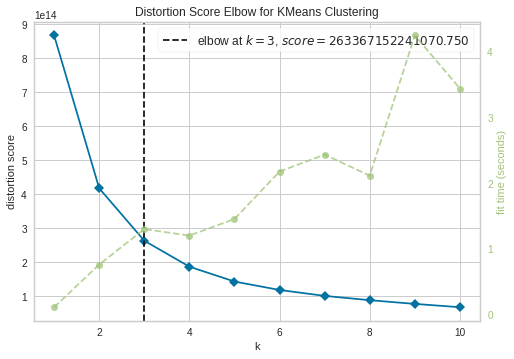

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=(1,11))
Elbow_M.fit(y)
Elbow_M.show()



In [ ]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(y)
print(y_kmeans3)
print(kmeans3.inertia_)

kmeans3.cluster_centers_

[1 1 0 ... 0 1 0]
263326138103077.62


array([[2.56086980e+05, 8.66784036e+00, 3.06466550e+00, 1.64881723e+05],
       [1.25424267e+05, 4.97448931e+00, 2.18659583e+00, 9.87547199e+04],
       [5.30234732e+05, 1.30135719e+01, 3.89651450e+00, 2.32072205e+05]])

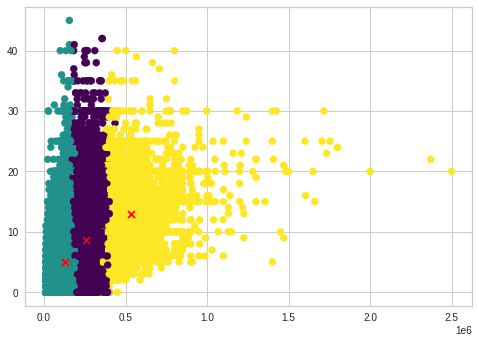

In [ ]:
plt.scatter(y[:,0],y[:,1], c=y_kmeans3, s = 50, cmap = "viridis")

plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], c='red', marker='x')

In [ ]:
yhat_kmeans = kmeans3.fit_predict(y)
df_test = df1.copy()
df_test["Clusters"] = yhat_kmeans
df_test.head()

,company,level,title,totalyearlycompensation,City,State,Country,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Clusters
264,GE Digital,Senior,Software Engineer,140000,San Ramon,CA,United States,4.0000,4.0000,130000,0.0000,10000.0000,Male,0,0,0,0,0,0,0,0,0,0,1
265,Amazon,L5,Software Engineer,172000,Seattle,WA,United States,12.0000,2.0000,142000,30000.0000,0.0000,Male,0,0,0,0,0,0,0,0,0,0,1
266,Uber,L5,Software Engineer,325000,San Francisco,CA,United States,7.0000,2.0000,161000,140000.0000,25000.0000,Male,0,0,0,0,0,0,0,0,0,0,2
269,Microsoft,60,Software Engineer,150000,Seattle,WA,United States,4.0000,0.0000,118000,5000.0000,12000.0000,Male,0,0,0,0,0,0,0,0,0,0,1
270,Google,L6,Software Engineer,640000,Mountain View,CA,United States,11.0000,4.0000,210000,380000.0000,50000.0000,Male,0,0,0,0,0,0,0,0,0,0,0


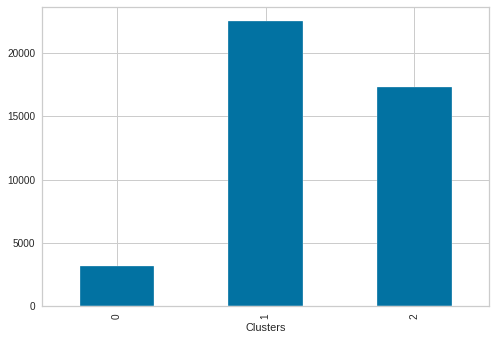

In [ ]:
df_test.groupby('Clusters').size().plot(kind='bar')

In [ ]:
df_test.columns

Index(['company', 'level', 'title', 'totalyearlycompensation', 'City', 'State',
       'Country', 'yearsofexperience', 'yearsatcompany', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic', 'Clusters'],
      dtype='object')

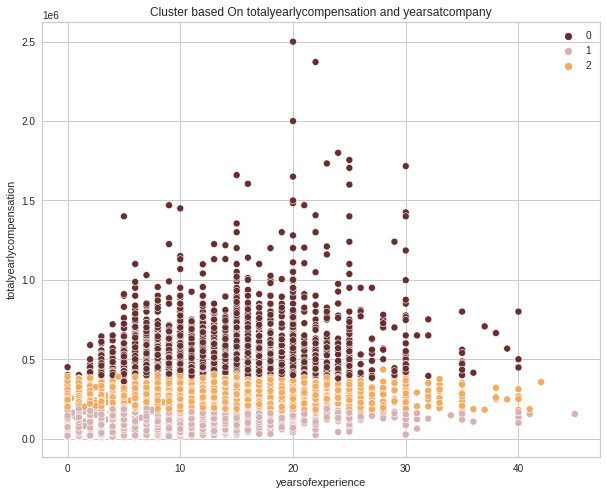

In [ ]:
pal = ["#682F2F", "#D6B2B1", "#F3AB60"]
fig = plt.figure(figsize=(10,8))

pl = sns.scatterplot(data = df_test,x=df_test["yearsofexperience"], y=df_test['totalyearlycompensation'],hue=df_test["Clusters"], palette= pal)
pl.set_title("Cluster based On totalyearlycompensation and yearsatcompany")
plt.legend()
plt.show()

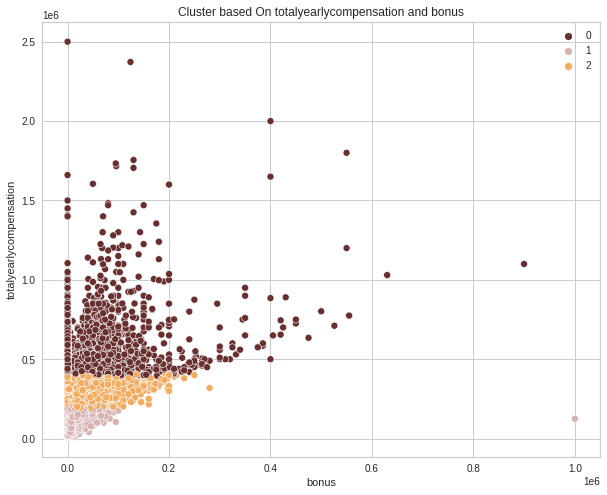

In [ ]:
pal = ["#682F2F", "#D6B2B1", "#F3AB60"]
fig = plt.figure(figsize=(10,8))

pl = sns.scatterplot(data = df_test,x=df_test["bonus"], y=df_test['totalyearlycompensation'],hue=df_test["Clusters"], palette= pal)
pl.set_title("Cluster based On totalyearlycompensation and bonus")
plt.legend()
plt.show()

In [ ]:
df_test.groupby('Clusters').size()
df_test.groupby('Clusters').totalyearlycompensation.mean() # totalyearlycompensation mean = $184000

cluster_df = pd.DataFrame(pd.concat([df_test.groupby('Clusters').size(),df_test.groupby('Clusters').totalyearlycompensation.mean()], axis =1))
cluster_df.columns = ["counts", "average total yearly compensation"]
cluster_df['percentage'] =cluster_df.counts.map(lambda x: x/cluster_df.counts.sum()*100)
cluster_df

,counts,average total yearly compensation,percentage
Clusters,,,
0,3159,533793.2890,7.3424
1,22514,126491.2724,52.3289
2,17351,258355.6279,40.3287


In [ ]:
graph = sns.lineplot(data = cluster_df, x = "percentage", y ="average total yearly compensation", marker='o')
graph.axhline(df_test.totalyearlycompensation.mean(), linestyle='--', label='avg total yearly compensation', c="#F3AB60")
graph.axhline(df_test[df_test.title == 'Software Engineer'].totalyearlycompensation.mean(), linestyle='--', label='SW engineer avg total yearly compensation', c = "#682F2F")
plt.legend()
plt.show()

*Cluster 0 (low incomer) : 26979 （62.7%) people with average total compansation of \$138,727, which is below the average total compansation of \$184,000<br/> Cluster 1 (high incomer): 2084 (4.8%) people with average total compansation of \$596,116, which is below the average total compansation of \$184,00<br/>Cluster 2 (middle incomer): 13964 (32.4%) people with average total compansation of \$289,758, which is above the average total compansation of \$184,00 *